# Predicting Student Academic Performance






## Introduction to Problem & Data

#### Data Pre-Processing & Preliminary Examination:

In [ ]:
# 1.1 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1.2 Load the UCI Student Performance dataset (math file)
url = 'student-mat.csv'
df = pd.read_csv(url, sep=';')


In [ ]:
# 1.3 Inspect the data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
# 1.4 Check for missing values
print(df.isnull().sum())

# 1.5 Encode categorical columns
#    Categorical variables include: 'school', 'sex', 'address', 'famsize', etc.
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# We'll encode categorical variables with one-hot encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# 1.6 Split data into features (X) and target (y)
X = df_encoded.drop(columns=['G3'])  # G3 is the math score (target)
y = df_encoded['G3']

# 1.7 Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1.8 Standardize the feature set (except target)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Pre-processed feature matrix shape:", X_train_scaled.shape)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
Pre-processed feature matrix shape: (316, 41)


## Exploratory Data Analysis

In [ ]:
df.head()          # first 5 rows

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


#### Descriptive Statistics

In [ ]:
# Basic stats for final grade and its two earlier periods
print("First period grade (G1) stats:\n", df['G1'].describe(), "\n")
print("Second period grade (G2) stats:\n", df['G2'].describe(), "\n")
print("Final grade (G3) stats:\n", df['G3'].describe(), "\n")


First period grade (G1) stats:
 count    395.000000
mean      10.908861
std        3.319195
min        3.000000
25%        8.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G1, dtype: float64 

Second period grade (G2) stats:
 count    395.000000
mean      10.713924
std        3.761505
min        0.000000
25%        9.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G2, dtype: float64 

Final grade (G3) stats:
 count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64 



#### Initial Visualizations

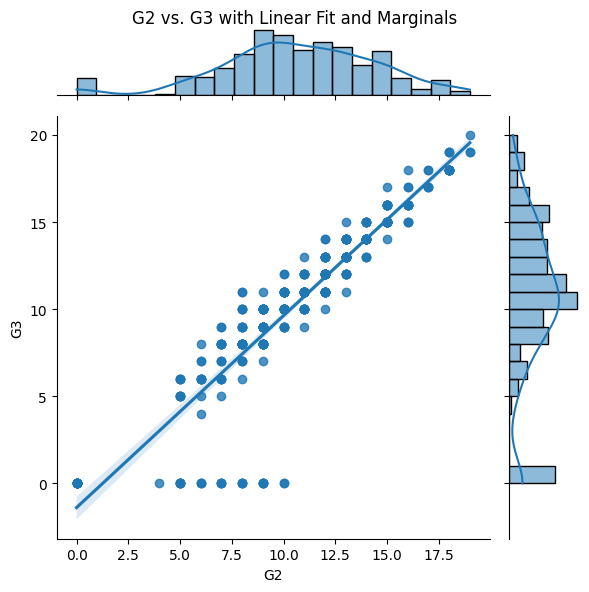

In [64]:
# Scatterplot with regression line for G2 vs. G3
g = sns.jointplot(
    data=df, x='G2', y='G3', kind='reg', height=6,
    marginal_kws={'bins':20, 'fill':True}
)
g.fig.suptitle('G2 vs. G3 with Linear Fit and Marginals')
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95)


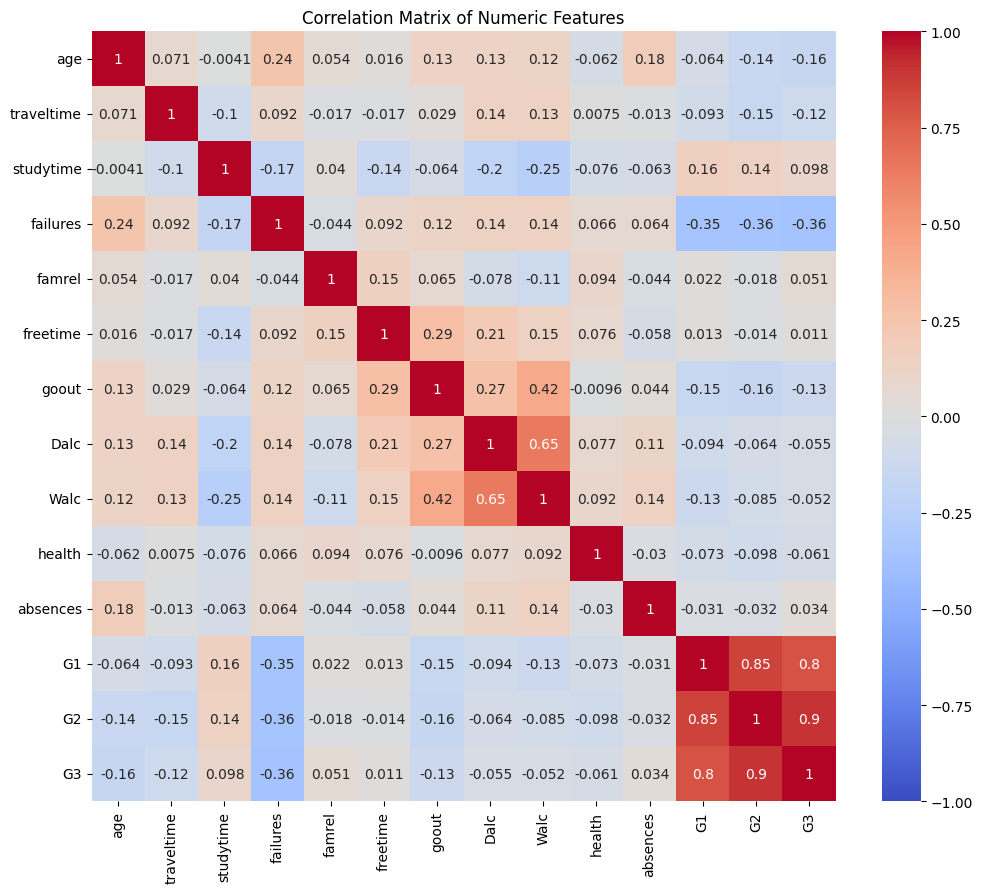

In [ ]:
numeric_cols = [
    'age','traveltime','studytime','failures',
    'famrel','freetime','goout','Dalc','Walc',
    'health','absences','G1','G2','G3'
]
plt.figure(figsize=(12,10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


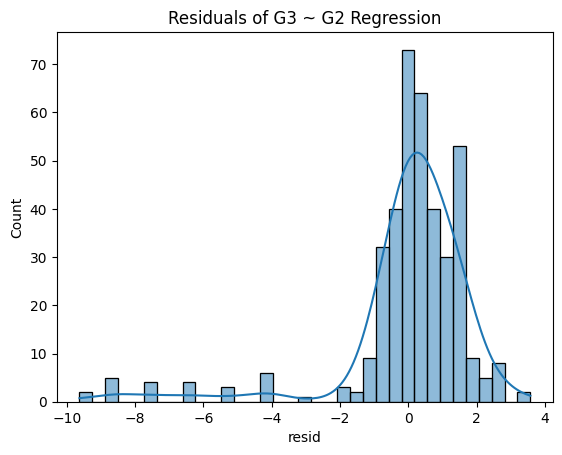

In [65]:
# Residuals of G2->G3 linear fit
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(df[['G2']], df['G3'])
df['resid'] = df['G3'] - lr.predict(df[['G2']])
sns.histplot(df['resid'], kde=True)
plt.title('Residuals of G3 ~ G2 Regression')
plt.show()


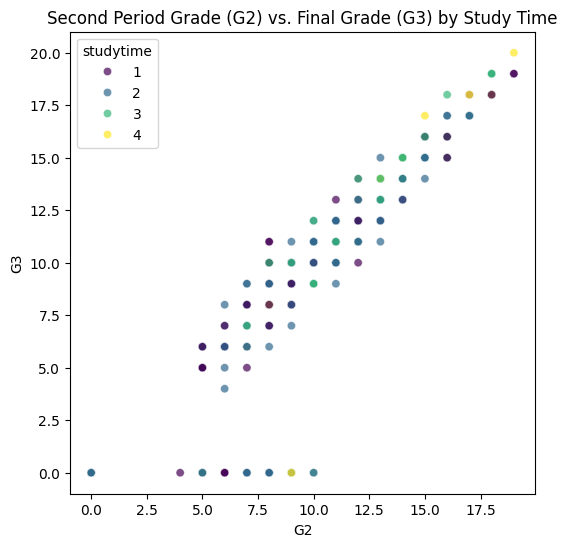

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='G2', y='G3', hue='studytime', data=df, palette='viridis', alpha=0.7)
plt.title("Second Period Grade (G2) vs. Final Grade (G3) by Study Time")
plt.xlabel("G2")
plt.ylabel("G3")
plt.show()


<Axes: xlabel='G2', ylabel='G3'>

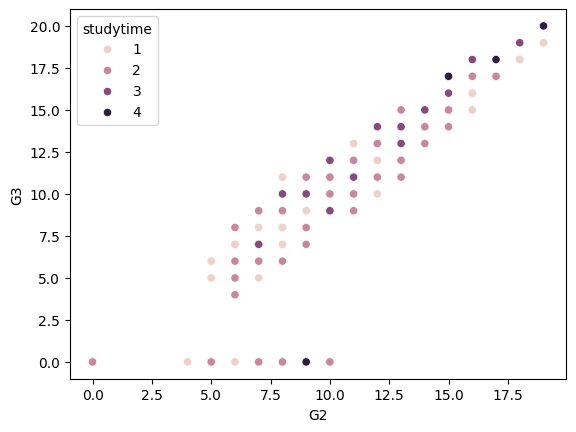

In [ ]:
sns.scatterplot(x='G2', y='G3', hue='studytime', data=df)

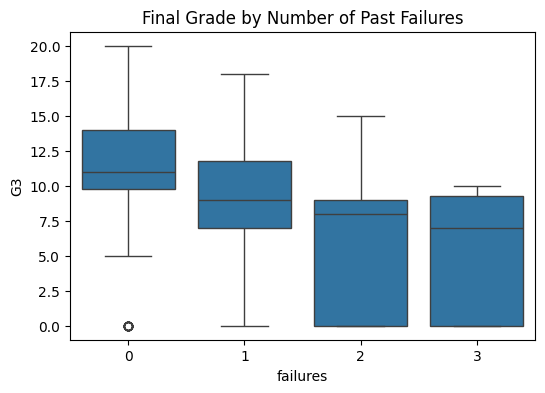

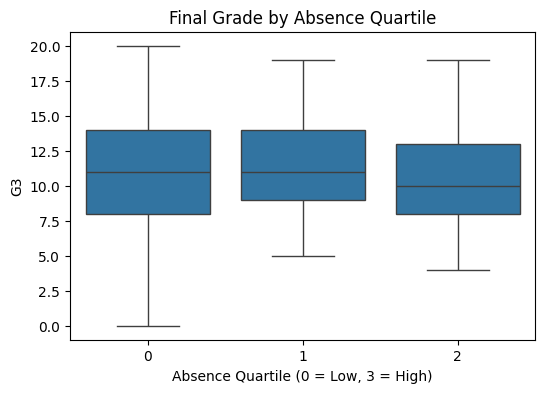

In [69]:
# Boxplot of failures vs. G3
plt.figure(figsize=(6,4))
sns.boxplot(x='failures', y='G3', data=df)
plt.title('Final Grade by Number of Past Failures')
plt.show()

# Absence quartiles
df['abs_quartile'] = pd.qcut(df['absences'], 4, labels=False, duplicates='drop')
plt.figure(figsize=(6,4))
sns.boxplot(x='abs_quartile', y='G3', data=df)
plt.xlabel('Absence Quartile (0 = Low, 3 = High)')
plt.title('Final Grade by Absence Quartile')
plt.show()

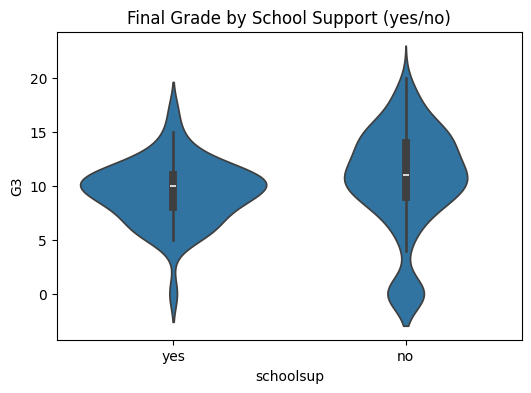

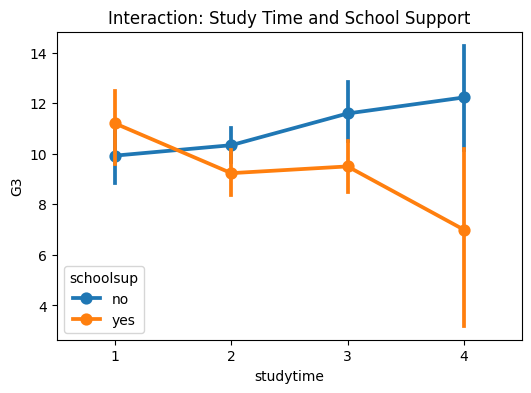

In [68]:
# Violin plot of G3 by family support
plt.figure(figsize=(6,4))
sns.violinplot(x='schoolsup', y='G3', data=df)
plt.title('Final Grade by School Support (yes/no)')
plt.show()

# Interaction: studytime × schoolsup on G3
plt.figure(figsize=(6,4))
sns.pointplot(x='studytime', y='G3', hue='schoolsup', data=df)
plt.title('Interaction: Study Time and School Support')
plt.show()

## Modeling & Interpretations

#### 1.Baseline Model

In [ ]:
y = df['G3']
baseline_preds = np.ones(len(y))*y.mean()
mean_squared_error(y, baseline_preds)

20.936478128505044

#### 2.Multiple Regression Model

In [ ]:
#create X & y, split into training and testing data
X = df[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
        'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
        'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']]
y = df['G3']  # Assuming you are predicting 'G3' (final grade)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

#encode categorical columns
cat_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

transformer = make_column_transformer(
    (OneHotEncoder(drop='first', sparse_output=False), cat_cols),
    remainder='passthrough'
)

#create pipeline for multiple regression model
pipe = Pipeline([('encode', transformer), ('model', LinearRegression())])

#fit pipeline
pipe.fit(X_train, y_train)

#find coefficients
lr = pipe.named_steps['model']
coefficients = lr.coef_
names = transformer.get_feature_names_out()
coefficients_df = pd.DataFrame(coefficients, names)

#find y-intercept
intercept = lr.intercept_

#calculate mse for training data
y_train_preds = pipe.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_preds)

#calculate mse for testing data
y_test_preds = pipe.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_preds)

# determine feature importance
r = permutation_importance(pipe, X_test, y_test, n_repeats=10, random_state=42)

# index by the original feature names, not the encoded ones
importance_df = pd.DataFrame(
    r.importances_mean,
    index=X_train.columns,
    columns=['importance']
).sort_values('importance', ascending=False)

# Output results
print("Coefficients:\n", coefficients_df)
print("Intercept:", intercept)
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Feature Importances:\n", importance_df)


Coefficients:
                                          0
onehotencoder__school_MS          0.529492
onehotencoder__sex_M              0.148624
onehotencoder__address_U          0.169304
onehotencoder__famsize_LE3        0.074159
onehotencoder__Pstatus_T         -0.205834
onehotencoder__Mjob_health       -0.174085
onehotencoder__Mjob_other         0.139780
onehotencoder__Mjob_services     -0.080118
onehotencoder__Mjob_teacher      -0.091409
onehotencoder__Fjob_health        0.350757
onehotencoder__Fjob_other         0.162221
onehotencoder__Fjob_services     -0.226068
onehotencoder__Fjob_teacher       0.360958
onehotencoder__reason_home       -0.267722
onehotencoder__reason_other       0.212702
onehotencoder__reason_reputation  0.178348
onehotencoder__guardian_mother    0.252911
onehotencoder__guardian_other    -0.031406
onehotencoder__schoolsup_yes      0.220728
onehotencoder__famsup_yes         0.179319
onehotencoder__paid_yes           0.037262
onehotencoder__activities_yes    -0.314

#### 3.K-Nearest Neighbors Regression Model




In [ ]:
cat_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus',
            'Mjob', 'Fjob', 'reason', 'guardian',
            'schoolsup', 'famsup', 'paid', 'activities',
            'nursery', 'higher', 'internet', 'romantic']
num_cols = [c for c in X.columns if c not in cat_cols]

# Build a ColumnTransformer
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop='first', sparse_output=False), cat_cols),
])

# Create the KNN pipeline
knn_pipe = Pipeline([
    ("pre", preprocessor),
    ("knn",  KNeighborsRegressor())
])

# Grid‐search
param_grid = {"knn__n_neighbors": [3, 5, 6, 10, 15, 20]}
grid_knn = GridSearchCV(
    knn_pipe, param_grid, cv=5, scoring="neg_mean_squared_error"
)
grid_knn.fit(X_train, y_train)

# Evaluate best model
best_k = grid_knn.best_params_["knn__n_neighbors"]
print("Best k:", best_k)

knn = grid_knn.best_estimator_
y_pred_train = knn.predict(X_train)
y_pred_test  = knn.predict(X_test)

print("KNN Train MSE:", mean_squared_error(y_train, y_pred_train))
print("KNN Test MSE: ", mean_squared_error(y_test,  y_pred_test))

#Permutation importances
r = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)
imp_df = pd.DataFrame(r.importances_mean, index=X.columns, columns=["importance"]) \
           .sort_values("importance", ascending=False)
print("\nFeature Importances:\n", imp_df.head(10))

Best k: 6
KNN Train MSE: 5.615066807313643
KNN Test MSE:  7.150492264416315

Feature Importances:
             importance
G2            0.285349
G1            0.268608
failures      0.037157
absences      0.034450
age           0.033732
romantic      0.029687
nursery       0.023943
traveltime    0.020294
goout         0.016926
freetime      0.014737


#### 4.Decision Tree Regression Model

Best params: {'tree__max_depth': 4, 'tree__min_samples_leaf': 1}
Decision Tree Train MSE: 2.3365329248039166
Decision Tree Test  MSE: 1.9003231271846655
Decision Tree Test  R²: 0.9018267583004197


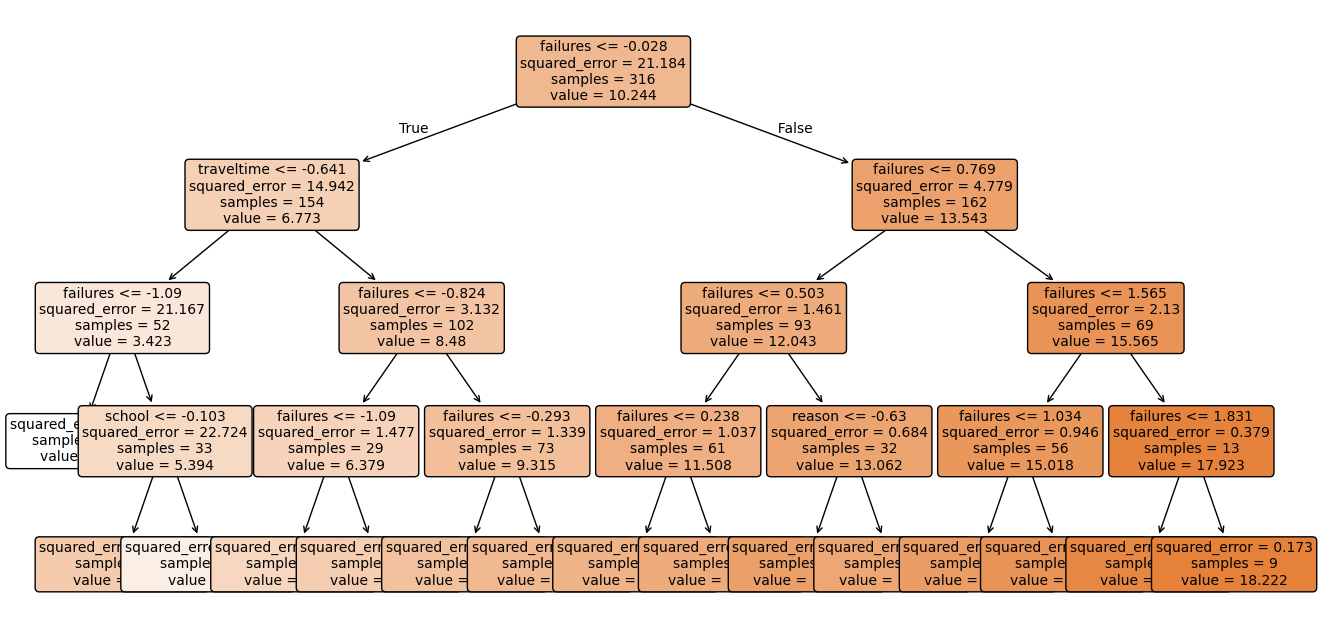


Decision Tree Feature Importances:
           importance
G2          1.848731
absences    0.198802
age         0.017801
Walc        0.000986
famsize     0.000000
school      0.000000
sex         0.000000
address     0.000000
Mjob        0.000000
Fjob        0.000000


In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.pipeline import Pipeline

tree_pipe = Pipeline([
    ("pre", preprocessor),                 # From previous KNN cell
    ("tree", DecisionTreeRegressor(random_state=42))
])

# Define a grid of hyperparameters (max_depth)
param_grid_tree = {
    "tree__max_depth": list(range(1, 11)),  # depths 1 to 10
    "tree__min_samples_leaf": [1, 2, 5]     # optionally tune leaf size
}

# Perform grid‐search
grid_tree = GridSearchCV(
    tree_pipe,
    param_grid_tree,
    cv=5,
    scoring="neg_mean_squared_error"
)
grid_tree.fit(X_train, y_train)

# Inspect best parameters
print("Best params:", grid_tree.best_params_)

# Evaluate on train & test
tree = grid_tree.best_estimator_
y_train_dt = tree.predict(X_train)
y_test_dt  = tree.predict(X_test)

print("Decision Tree Train MSE:", mean_squared_error(y_train, y_train_dt))
print("Decision Tree Test  MSE:", mean_squared_error(y_test,  y_test_dt))
print("Decision Tree Test  R²:", r2_score(y_test, y_test_dt))


# Plot the final tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 8))
plot_tree(
    tree.named_steps["tree"],
    filled=True,
    feature_names=X.columns,
    rounded=True,
    fontsize=10
)
plt.show()

# Permutation importances
from sklearn.inspection import permutation_importance

r = permutation_importance(tree, X_test, y_test, n_repeats=10, random_state=42)
imp_dt = pd.DataFrame(r.importances_mean, index=X.columns, columns=["importance"]) \
           .sort_values("importance", ascending=False)

print("\nDecision Tree Feature Importances:\n", imp_dt.head(10))


#### 5.Random Forest Regression Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
import pandas as pd



# Build Pipeline
rf_pipe = Pipeline([
    ("pre", preprocessor),  # same ColumnTransformer as before
    ("rf", RandomForestRegressor(random_state=42))
])

# Hyperparameter grid: number of trees & max depth
param_grid_rf = {
    "rf__n_estimators": [50, 100, 200],
    "rf__max_depth":    [3, 5, 7, None]
}

# Grid Search
grid_rf = GridSearchCV(
    rf_pipe,
    param_grid_rf,
    cv=5,
    scoring="neg_mean_squared_error"
)
grid_rf.fit(X_train, y_train)

#Best parameters
print("Best Random Forest params:", grid_rf.best_params_)

# Evaluate on train & test
best_rf = grid_rf.best_estimator_
y_train_rf = best_rf.predict(X_train)
y_test_rf  = best_rf.predict(X_test)

print("Random Forest Train MSE:", mean_squared_error(y_train, y_train_rf))
print("Random Forest Test  MSE:", mean_squared_error(y_test,  y_test_rf))
print("Random Forest Test  R²:", r2_score(y_test, y_test_rf))


r = permutation_importance(best_rf, X_test, y_test, n_repeats=10, random_state=42)
imp_rf = pd.DataFrame(
    r.importances_mean,
    index=X.columns,
    columns=["importance"]
).sort_values("importance", ascending=False)

print("\nRandom Forest Feature Importances:\n", imp_rf.head(10))


Best Random Forest params: {'rf__max_depth': 7, 'rf__n_estimators': 100}
Random Forest Train MSE: 0.510255997137794
Random Forest Test  MSE: 1.28114305036152
Random Forest Test  R²: 0.9338144315902667
